In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing

In [2]:
data_losses = pd.read_csv('automobile-losses.csv')
data_losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [3]:
data_risk = pd.read_csv('automobile-risk.csv')
data_risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [4]:
data_spec = pd.read_csv('automobile-spec.csv')
data_spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
#pd.concat(merge, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
merge = pd.merge(pd.merge(data_losses, data_risk, on='ID'),data_spec, on='ID')
merge

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,6,NaN,2,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,7,158.0,1,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,8,NaN,1,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,9,158.0,1,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,10,NaN,0,audi,gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


### 2. Quick-look

In [6]:
#Dimension
merge.shape

(205, 27)

In [7]:
#Data Type
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [8]:
#head
merge.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
#tail
merge.tail()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,95.0,-1,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [10]:
#summary stistics
merge.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Missing Values

In [11]:
numerical=['ID','normalized-losses','symboling','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
missing_values = merge[numerical].isnull().sum().sort_values(ascending=False)
missing_values

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
width                 0
symboling             0
wheel-base            0
length                0
engine-size           0
height                0
curb-weight           0
highway-mpg           0
compression-ratio     0
city-mpg              0
ID                    0
dtype: int64

In [12]:
categorical=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheel','engine-loc','engine-type','cylinder','fuel-system']
missing_values = merge[categorical].isnull().median().sort_values(ascending=False)
missing_values

fuel-system     0.0
cylinder        0.0
engine-type     0.0
engine-loc      0.0
drive-wheel     0.0
body-style      0.0
num-of-doors    0.0
aspiration      0.0
fuel-type       0.0
make            0.0
dtype: float64

### Visualization

#### Bar Chart

In [13]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(merge['engine-size'], 
         facecolor='black', 
         edgecolor='blue', 
         bins=10)
plt.show()

In [14]:
merge2= merge[['make','engine-size']]
merge2

,make,engine-size
0,alfa-romero,130
1,alfa-romero,130
2,alfa-romero,152
3,audi,109
4,audi,136
5,audi,136
6,audi,136
7,audi,136
8,audi,131
9,audi,131


In [15]:
merge3=merge2.groupby(['make']).mean()
merge3

,engine-size
make,
alfa-romero,137.333333
audi,130.714286
bmw,166.875000
chevrolet,80.333333
dodge,102.666667
honda,99.307692
isuzu,102.500000
jaguar,280.666667
mazda,103.000000


#### Pie Chart

<function matplotlib.pyplot.show>

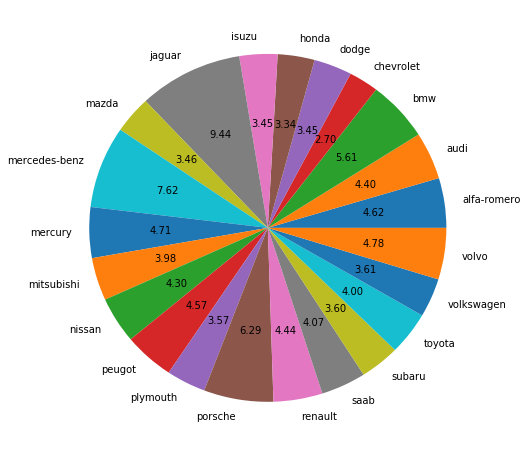

In [16]:
plt.figure(figsize=(8,8))
plt.pie(merge3, labels=merge3.index, autopct='%.2f')
plt.show

#### Box Plot

In [17]:
merge4 = merge[['length', 'width', 'height']]
merge4.head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [18]:
merge4.describe()

,length,width,height
count,205.000000,205.000000,205.000000
mean,174.049268,65.907805,53.724878
std,12.337289,2.145204,2.443522
min,141.100000,60.300000,47.800000
25%,166.300000,64.100000,52.000000
50%,173.200000,65.500000,54.100000
75%,183.100000,66.900000,55.500000
max,208.100000,72.300000,59.800000


In [19]:
merge5=np.array(merge4)
merge5

array([[168.8,  64.1,  48.8],
       [168.8,  64.1,  48.8],
       [171.2,  65.5,  52.4],
       [176.6,  66.2,  54.3],
       [176.6,  66.4,  54.3],
       [177.3,  66.3,  53.1],
       [192.7,  71.4,  55.7],
       [192.7,  71.4,  55.7],
       [192.7,  71.4,  55.9],
       [178.2,  67.9,  52. ],
       [176.8,  64.8,  54.3],
       [176.8,  64.8,  54.3],
       [176.8,  64.8,  54.3],
       [176.8,  64.8,  54.3],
       [189. ,  66.9,  55.7],
       [189. ,  66.9,  55.7],
       [193.8,  67.9,  53.7],
       [197. ,  70.9,  56.3],
       [141.1,  60.3,  53.2],
       [155.9,  63.6,  52. ],
       [158.8,  63.6,  52. ],
       [157.3,  63.8,  50.8],
       [157.3,  63.8,  50.8],
       [157.3,  63.8,  50.8],
       [157.3,  63.8,  50.6],
       [157.3,  63.8,  50.6],
       [157.3,  63.8,  50.6],
       [157.3,  63.8,  50.6],
       [174.6,  64.6,  59.8],
       [173.2,  66.3,  50.2],
       [144.6,  63.9,  50.8],
       [144.6,  63.9,  50.8],
       [150. ,  64. ,  52.6],
       [15

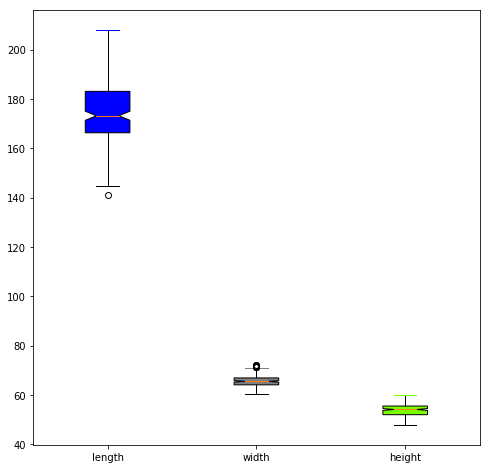

In [20]:
plt.figure(figsize=(8,8))
colors = ['blue', 'grey', 'lawngreen']

bp = plt.boxplot(merge5, 
                 patch_artist=True,
                 notch=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2, 3], ['length', 'width', 'height'])

plt.show()

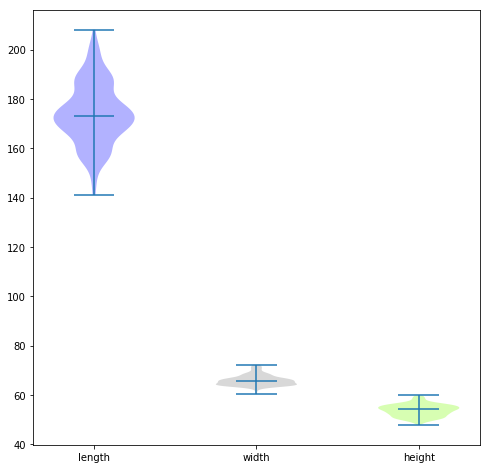

In [160]:
#ViolinPlot
plt.figure(figsize=(8,8))
vp = plt.violinplot(merge5,
                    showmedians=True)

plt.xticks([1, 2, 3], ['length', 'width', 'height'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

plt.show()   

#### Violin Plot

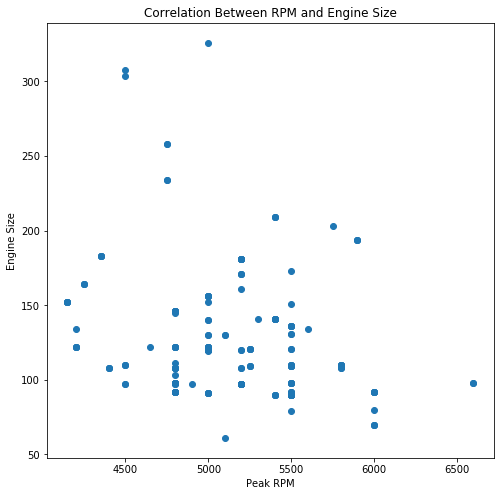

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(merge['peak-rpm'],merge['engine-size'])
plt.title('Correlation Between RPM and Engine Size')
plt.xlabel('Peak RPM')
plt.ylabel('Engine Size')
plt.show()

## Part 2

### 1. Car Brand with highest Price

In [22]:
Highest_Price = merge.sort_values(by=['price'], ascending=False)
Highest_Price[['make', 'price']].head(1)

,make,price
74,mercedes-benz,45400.0


### 2. Maximum Horsepower for car with 6 cylinder engine

In [23]:
Max_Horsepower=merge[merge['cylinder']=='six']
data_max=Max_Horsepower['horsepower'].max()
data_max

207.0

### 3. Average Peak-rpm for 'turbo' style aspiration car

In [24]:
Average_Peak=merge[merge['aspiration']=='turbo']
data_rpm=Average_Peak['peak-rpm'].mean()
data_rpm

4939.189189189189

### 4. Average price based on body-style

In [25]:
Average_Price=merge.groupby('body-style').price.mean().sort_values().reset_index()
Average_Price

,body-style,price
0,hatchback,9957.441176
1,wagon,12371.960000
2,sedan,14459.755319
3,convertible,21890.500000
4,hardtop,22208.500000


### 5. Average price based on body-style only for Honda car

make=Honda

In [26]:
Honda=merge[merge['make']=='honda']
Average_Honda=Honda.groupby('body-style').price.mean().sort_values().reset_index()
Average_Honda

,body-style,price
0,hatchback,7054.428571
1,wagon,7295.000000
2,sedan,9945.000000
